In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import  LabelEncoder
from sklearn.decomposition import  PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import  parse
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from imblearn.over_sampling import  SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
df=pd.read_csv('Salary Prediction of Data Professions.csv')
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [4]:
df.head(5)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [5]:
df.tail(5)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1
2638,GREGORY,ABARCA,M,9-18-2014,01-07-2016,Analyst,24.0,49176,Marketing,17.0,13.0,2.0,2


In [6]:
df.sample(5)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
1232,LONNIE,ACERRA,M,12-18-2014,01-07-2016,Analyst,21.0,48626,Marketing,27.0,3.0,2.0,0
478,REBECCA,ALPAUGH,F,02-02-2014,01-07-2016,Analyst,22.0,49744,Web,28.0,2.0,2.0,0
2530,VILMA,APRIGLIANO,F,1-18-2014,01-07-2016,Analyst,23.0,46984,Web,24.0,6.0,4.0,0
197,CARIDAD,ARMWOOD,F,06-11-2014,01-07-2016,Analyst,23.0,45022,Finance,23.0,7.0,3.0,0
2555,JEWELL,ANGELI,F,3-27-2012,01-07-2016,Manager,32.0,112363,Finance,18.0,12.0,3.0,7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [8]:
df.columns=df.columns.str.lower()
df

,first name,last name,sex,doj,current date,designation,age,salary,unit,leaves used,leaves remaining,ratings,past exp
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [9]:
df.describe()

,age,salary,leaves used,leaves remaining,ratings,past exp
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [10]:
columns_to_select = ['age', 'salary', 'leaves used', 'leaves remaining', 'ratings', 'past exp']
df1=df[columns_to_select]
df1.corr()

,age,salary,leaves used,leaves remaining,ratings,past exp
age,1.000000,0.872213,0.007825,-0.006515,0.036801,0.903926
salary,0.872213,1.000000,0.006498,-0.005422,0.020248,0.854046
leaves used,0.007825,0.006498,1.000000,-1.000000,0.002200,0.008601
leaves remaining,-0.006515,-0.005422,-1.000000,1.000000,-0.003415,-0.006728
ratings,0.036801,0.020248,0.002200,-0.003415,1.000000,0.040123
past exp,0.903926,0.854046,0.008601,-0.006728,0.040123,1.000000


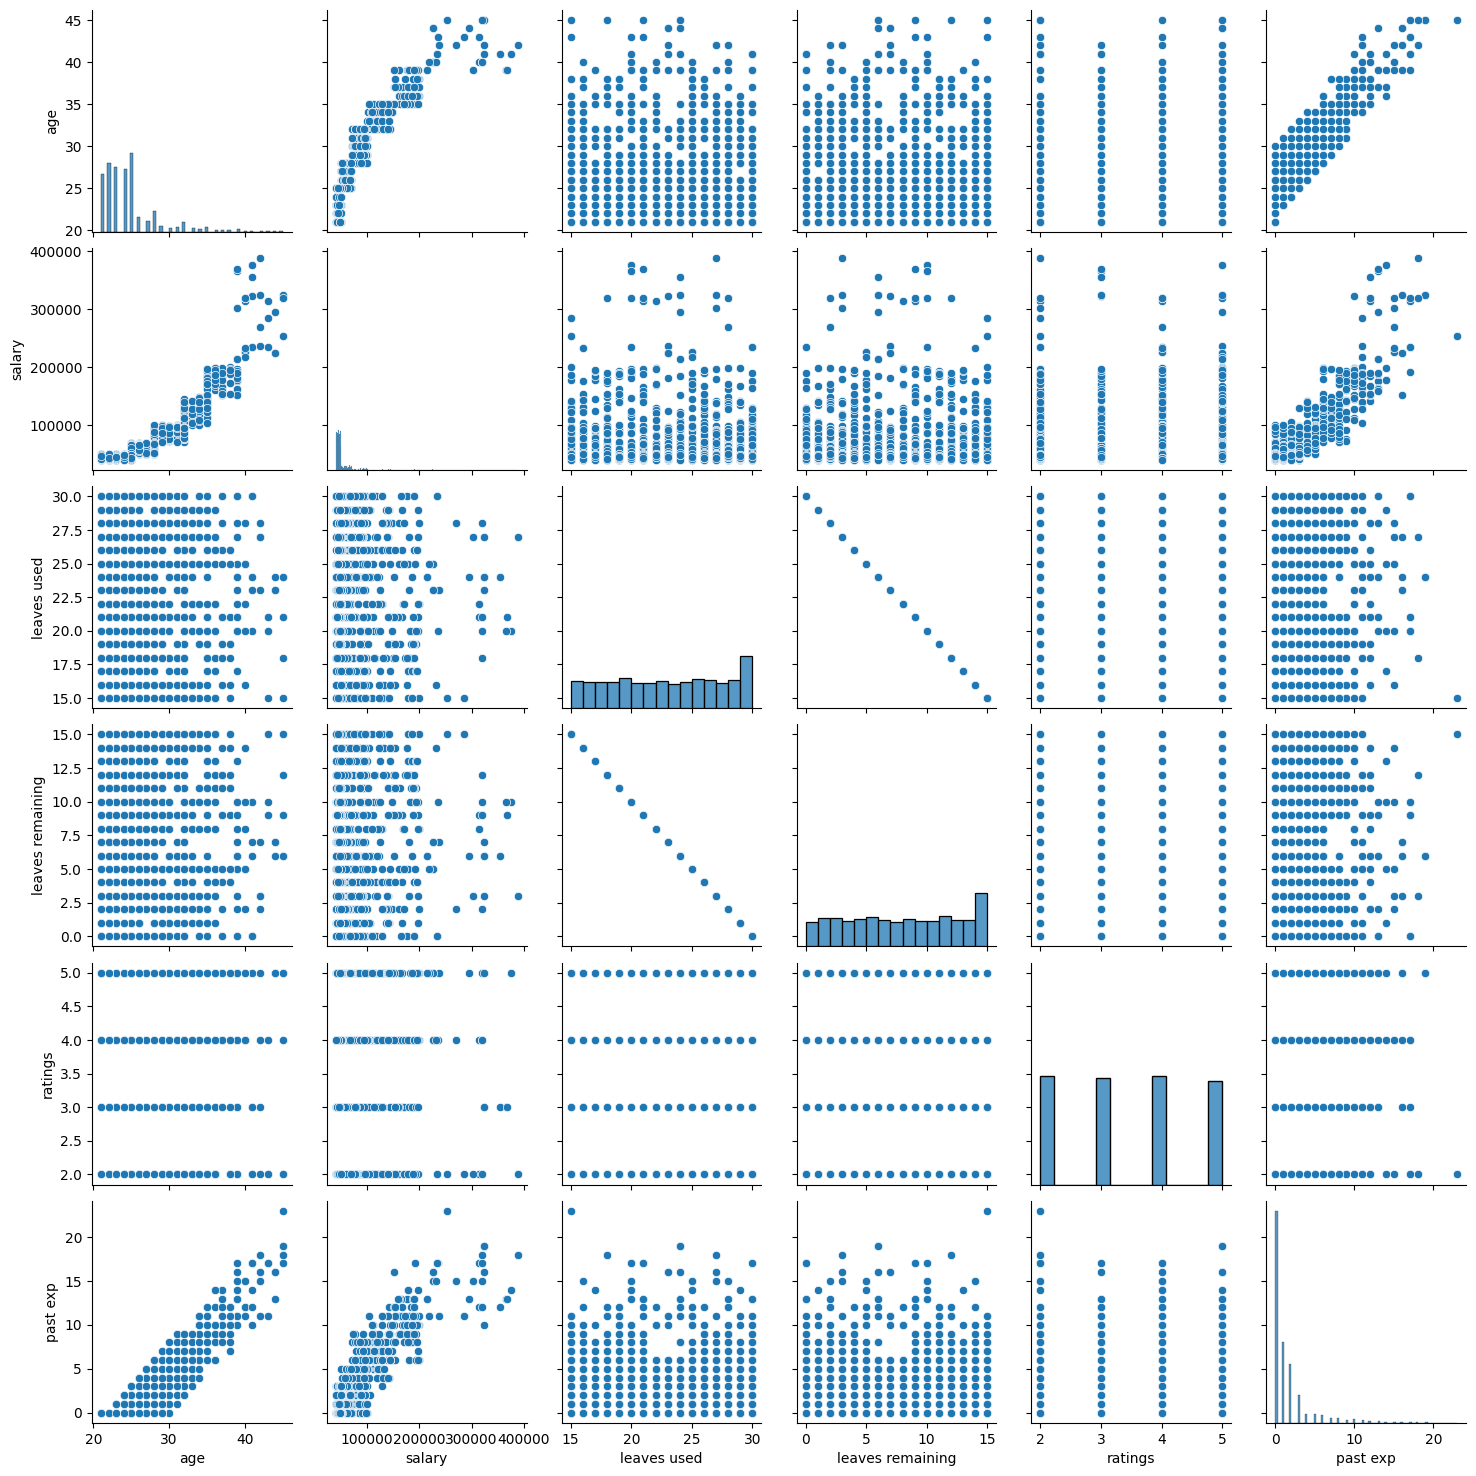

In [11]:
sns.pairplot(df)

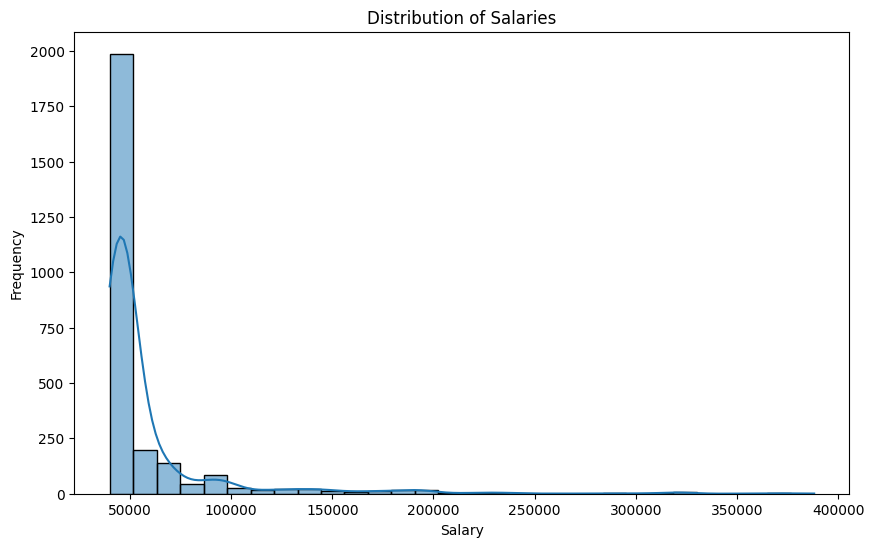

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['salary'],bins=30,kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Salary vs Age')

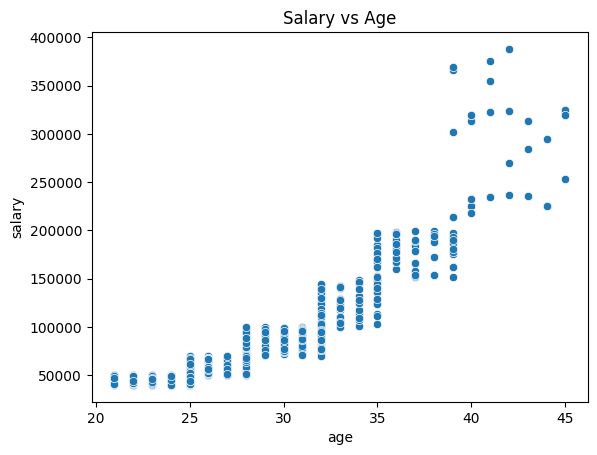

In [13]:
sns.scatterplot(x='age',y='salary',data=df)
plt.title('Salary vs Age')

<Axes: xlabel='sex', ylabel='salary'>

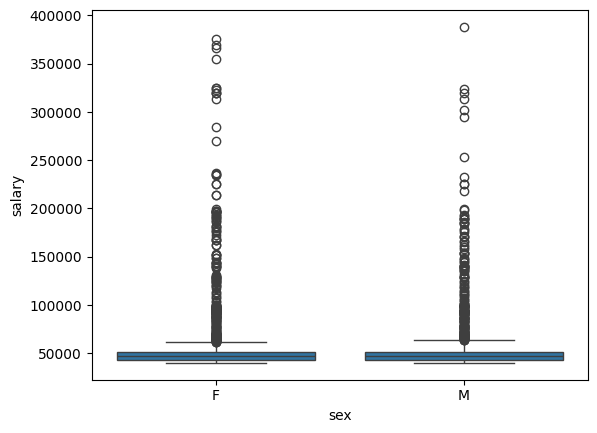

In [14]:
sns.boxplot(x="sex",y='salary',data=df)

<Axes: xlabel='salary', ylabel='designation'>

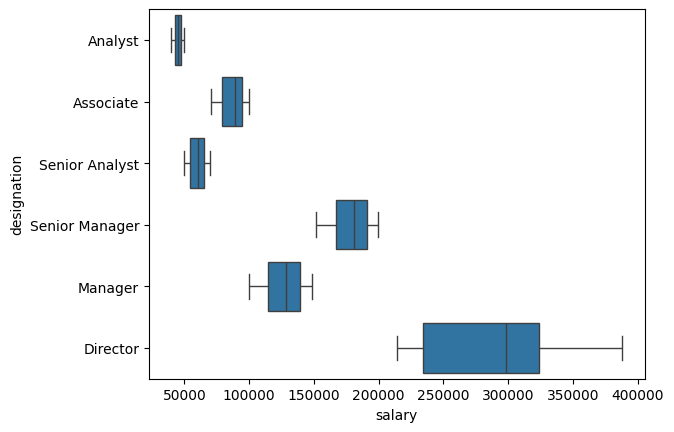

In [16]:
sns.boxplot(x='salary',y='designation',data=df)

In [17]:
df1

,age,salary,leaves used,leaves remaining,ratings,past exp
0,21.0,44570,24.0,6.0,2.0,0
1,NaN,89207,NaN,13.0,NaN,7
2,21.0,40955,23.0,7.0,3.0,0
3,22.0,45550,22.0,8.0,3.0,0
4,NaN,43161,27.0,3.0,NaN,3
...,...,...,...,...,...,...
2634,36.0,185977,15.0,15.0,5.0,10
2635,23.0,45758,17.0,13.0,2.0,0
2636,21.0,47315,29.0,1.0,5.0,0
2637,24.0,45172,23.0,7.0,3.0,1


In [18]:
df1.corr()

,age,salary,leaves used,leaves remaining,ratings,past exp
age,1.000000,0.872213,0.007825,-0.006515,0.036801,0.903926
salary,0.872213,1.000000,0.006498,-0.005422,0.020248,0.854046
leaves used,0.007825,0.006498,1.000000,-1.000000,0.002200,0.008601
leaves remaining,-0.006515,-0.005422,-1.000000,1.000000,-0.003415,-0.006728
ratings,0.036801,0.020248,0.002200,-0.003415,1.000000,0.040123
past exp,0.903926,0.854046,0.008601,-0.006728,0.040123,1.000000


<Axes: >

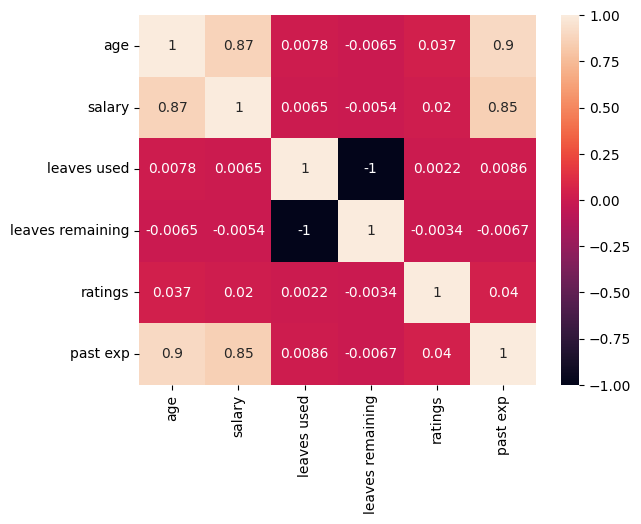

In [19]:
sns.heatmap(df1.corr(),annot=True)

In [20]:
df.isnull().sum()

first name          0
last name           2
sex                 0
doj                 1
current date        0
designation         0
age                 3
salary              0
unit                0
leaves used         3
leaves remaining    2
ratings             2
past exp            0
dtype: int64

In [21]:
df.head()

,first name,last name,sex,doj,current date,designation,age,salary,unit,leaves used,leaves remaining,ratings,past exp
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [22]:
le=LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col]=le.fit_transform(df[col])
df.head()

,first name,last name,sex,doj,current date,designation,age,salary,unit,leaves used,leaves remaining,ratings,past exp
0,2208,2436,0,751,0,0,21.0,44570,0,24.0,6.0,2.0,0
1,127,2475,0,967,0,1,NaN,89207,5,NaN,13.0,NaN,7
2,1770,1671,0,865,0,0,21.0,40955,0,23.0,7.0,3.0,0
3,392,2137,0,109,0,0,22.0,45550,1,22.0,8.0,3.0,0
4,1377,161,1,494,0,0,NaN,43161,4,27.0,3.0,NaN,3


In [23]:
df.fillna(df.mean(),inplace=True)

In [24]:
x=df.drop('salary',axis=1)
y=df['salary']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test

(      first name  last name  sex  doj  current date  designation   age  unit  \
 2395         627       1637    0  304             0            0  22.0     2   
 440         2130       1821    0  101             0            0  24.0     2   
 508         1867        615    1  399             0            4  27.0     1   
 76          1254       1553    0  214             0            0  24.0     5   
 522          968       2172    0  711             0            0  24.0     4   
 ...          ...        ...  ...  ...           ...          ...   ...   ...   
 1638          56        910    1  495             0            0  25.0     3   
 1095         285       1762    0  380             0            5  36.0     0   
 1130        1233       1585    0  668             0            0  23.0     5   
 1294        1871        131    1  880             0            0  23.0     5   
 860          787       1996    0  886             0            0  23.0     3   
 
       leaves used  leaves

In [25]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred=model.predict(x_test)
print(y_pred)
mse=mean_squared_error(y_test,y_pred)
print("Mean squared error:", mse)

[136022.72737355  51571.65550578  51733.51461151  52386.51639039
  68473.71543761  42162.60521125  80754.65322171  41536.08258218
 186117.71944406  31470.7402991   79338.84399651  67259.82283521
  66374.32632472  30464.92046199  68557.24955969  61188.80527572
  66590.71975954  30969.76774241  66112.22300529  31439.99404433
  41852.7097288   46089.41141328  47440.40340117  50326.37251095
  36084.10553438  41515.17772144  62082.23831498  60644.49586398
  55153.54794554  70922.36548195  59633.88298643  30338.30658761
  43173.68886651  41670.70482527  35375.93026778 127055.75872186
  56333.42922916  41830.52240761  57076.94345504  52918.24443049
  51247.82487012  42187.69748236  51279.05122012  55939.97766745
  35068.66043252  51880.08795026  36488.64595322  62804.49532303
  31261.37322452  62647.75989335 111678.53411642  42552.28458946
  32354.28979343  37661.96121358  56692.00343534  32971.87365601
  51987.41228738  40859.34152306  52187.12385072  31523.1140597
  50147.90629116  63830.71

In [29]:
mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute error:", mae)

Mean absolute error: 12531.69107970105


In [31]:
r2=r2_score(y_test,y_pred)
print('R-squared score :',r2)

R-squared score : 0.7593911334181406


In [32]:
model.score(x_test,y_test)

0.7593911334181406

In [33]:
model.score(x_train,y_train)

0.7930278833905532

In [34]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
y_pred1=dt.predict(x_test)
y_pred1

array([186356.,  44649.,  49190.,  40329.,  73397.,  46966.,  62169.,
        49434., 320148.,  40414.,  61867.,  49866.,  50084.,  48018.,
        68295.,  43714.,  45172.,  40524.,  43563.,  43383.,  41920.,
        41516.,  41353.,  65596.,  43733.,  44305.,  41045.,  54573.,
        65212.,  52690.,  43328.,  42148.,  44214.,  47807.,  40318.,
       132054.,  48602.,  48730.,  43070.,  43433.,  44856.,  42455.,
        45370.,  43295.,  48587.,  59115.,  42160.,  49826.,  41227.,
        49644.,  76143.,  45527.,  41378.,  45062.,  43310.,  41925.,
        69716.,  42213.,  47764.,  48223.,  64913.,  47903.,  40246.,
        45217.,  46779.,  42214., 197246.,  43031.,  49453.,  44145.,
        40800., 128247.,  41250.,  42950.,  45275.,  40634.,  71816.,
        51369.,  60827.,  45174.,  40363., 323196.,  45340.,  51565.,
        41124.,  43308.,  53275.,  93659.,  46752.,  88029.,  40718.,
        42848.,  45389.,  47257.,  44856.,  45464.,  52324.,  87324.,
        42686.,  470

In [36]:
mse1=mean_absolute_error(y_test,y_pred1)
mse1

5150.545454545455

In [37]:
r2_1=r2_score(y_test,y_pred1)
r2_1

0.9301813151795492

In [39]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
y_pred2=rf.predict(x_test)
y_pred2

array([185386.13,  46250.24,  46285.84,  43762.69,  85103.56,  46136.85,
        58877.19,  45819.83, 259717.07,  43627.79,  61187.96,  44598.2 ,
        53128.8 ,  44356.78,  64367.81,  45931.8 ,  45235.47,  44938.04,
        43332.34,  45627.35,  43496.69,  44137.84,  43963.41,  58533.11,
        43889.34,  45628.77,  45871.14,  62365.7 ,  60075.87,  59203.46,
        43868.74,  45593.05,  44192.29,  44755.92,  45621.71, 122186.27,
        45383.04,  46065.26,  45810.49,  45435.6 ,  45215.08,  42655.72,
        46671.78,  44105.61,  43929.78,  59706.26,  44958.79,  44666.39,
        45419.95,  45914.07,  83385.98,  46036.67,  44701.82,  45572.47,
        46595.64,  44647.59,  61776.63,  42881.51,  45931.59,  44545.48,
        62920.94,  45369.8 ,  45706.28,  44766.27,  45369.58,  43503.72,
       188243.42,  45261.72,  46298.66,  44353.53,  46067.41, 127036.57,
        44030.55,  44942.69,  45419.54,  44011.08,  88724.5 ,  58855.37,
        57441.92,  45369.6 ,  41563.53, 282936.11, 

In [41]:
mse2=mean_absolute_error(y_test,y_pred2)
mse2

4317.633579545454

In [69]:
r2_2=r2_score(y_test,y_pred2)
r2_2

0.9406226739657934

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb

GradientBoostingRegressor()

In [58]:
gb.fit(x_train,y_train)
y_pred3=gb.predict(x_test)
y_pred3

array([186728.59405888,  45070.84294477,  45198.82691064,  44341.84407785,
        81371.41323456,  44993.81104778,  60012.55950194,  45292.22543005,
       248282.98082785,  46592.29470295,  61274.77811785,  45274.74071182,
        59735.6478639 ,  44849.63653917,  59562.40381207,  45161.56262571,
        45448.3841448 ,  45194.83557534,  45522.0078771 ,  45264.25926915,
        44988.09440933,  44778.21524534,  46882.0249771 ,  58839.86833143,
        44286.40330087,  45198.82691064,  45389.35348674,  59522.80679308,
        57887.95649934,  62591.41274145,  44642.91314146,  45139.87559998,
        44823.72634765,  45119.02063677,  45640.15781882, 125635.32727244,
        44615.7056458 ,  45640.15781882,  45432.884061  ,  45006.098115  ,
        44537.2394815 ,  45078.99462454,  45286.24496378,  45221.14434919,
        45017.14267203,  58688.08561964,  45018.65590407,  45274.74071182,
        44790.28125379,  44587.97695142,  86642.23965434,  45450.27752269,
        45314.25621641,  

In [59]:
mse3=mean_absolute_error(y_test,y_pred3)
print('Mean Absolute Error:',mse3)

Mean Absolute Error: 4661.074643221528


In [60]:
r2_3=r2_score(y_test,y_pred3)
print('R-squared:',r2_3)

R-squared: 0.9313643404629065


C:\Users\KHALID\AppData\Local\Temp\ipykernel_21836\1556638125.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=models,y=r2_scores,palette='Set3')


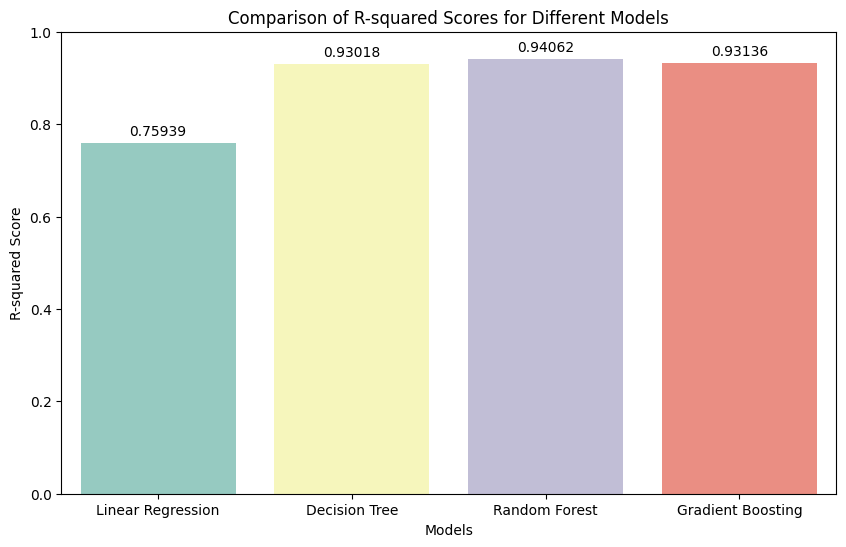

In [68]:
r2=0.75939113
r2_1=0.93018131
r2_2=0.94062267
r2_3=0.93136434
models=['Linear Regression','Decision Tree','Random Forest','Gradient Boosting']
r2_scores=[r2,r2_1,r2_2,r2_3]
plt.figure(figsize=(10,6))
ax=sns.barplot(x=models,y=r2_scores,palette='Set3')
for m,score in enumerate(r2_scores):
    ax.text(m , score +0.01 ,f'{score:.5f}', ha='center' , va='bottom')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores for Different Models')
plt.ylim(0,1)
plt.show()